# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [4]:
import pandas as pd
import numpy as np
## Load the data into a DataFrame
df = pd.read_csv('../Resources/Iowa_Liquor_sales_sample_10pct.csv')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# build on train dataset


## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

In [5]:
cc = df.set_index('City')['County'].to_frame()
cc.dropna(inplace=True)
undefined = pd.DataFrame([['Wayne'],['Polk'],['Fremont'],['Wayne'],['Polk'],['Fremont']], columns=['County'], index=['SEYMOUR', 'RUNNELLS', 'TABOR','SEYMOUR', 'RUNNELLS', 'TABOR'])
df2 = pd.concat([cc, undefined])

def get_county(city):
    return df2.T[city].values[0][0]


In [6]:
citys_wo_county = df[pd.isnull(df["County"])]["City"].to_frame()
for row in citys_wo_county.index:
    df.set_value(row, 'County', get_county(citys_wo_county.ix[row]['City']))

In [7]:
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0', '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])
def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

In [8]:
category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

In [9]:
del df['County Number']
test = df.dropna()
print test.shape
print df.shape

(270887, 17)
(270955, 17)


In [15]:
df["Date"] = pd.to_datetime(df["Date"])

In [16]:
del df['Category']

KeyError: 'Category'

In [17]:
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: x.replace('$','')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: x.replace('$','')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: x.replace('$','')).astype(float)

AttributeError: 'float' object has no attribute 'replace'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 16 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County                   270955 non-null object
Category Name            270887 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 33.1+ MB


In [21]:
df_y = df['Sale (Dollars)']
df_X = df.drop(["Sale (Dollars)"], axis=1)

In [23]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

In [24]:
train = pd.concat([X_train,y_train],axis = 1)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [26]:
train.head()

,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
148211,2015-04-16,2616,CLINTON,52732,Clinton,MISC. IMPORTED CORDIALS & LIQUEURS,192,65257,Jagermeister Liqueur,1000,15.54,23.31,12,12.0,3.17,279.72
86988,2015-10-19,4757,BONDURANT,50035,Polk,VODKA FLAVORED,260,77740,Smirnoff Raspberry,750,8.25,12.38,2,1.5,0.40,24.76
159071,2015-04-21,3841,DUBUQUE,52001,Dubuque,STRAIGHT BOURBON WHISKIES,65,19066,Jim Beam,750,10.49,15.74,2,1.5,0.40,31.48
105513,2015-11-24,2652,MASON CITY,50401,Cerro Gordo,CREAM LIQUEURS,260,68036,Bailey's Original Irish Cream,750,13.49,20.24,4,3.0,0.79,80.96
213892,2015-10-21,4129,AMES,50010,Story,WHISKEY LIQUEUR,421,64866,Fireball Cinnamon Whiskey,750,8.98,13.47,12,9.0,2.38,161.64


In [352]:
train.describe()

,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
count,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000,181539.000000
mean,3590.585053,256.271270,45983.835192,924.978770,9.765135,14.663504,9.903079,8.989421,2.374964,129.210287,86.011245
std,947.733571,141.132903,52834.480273,493.134028,6.991380,10.486689,23.681657,28.383327,7.498074,384.571656,255.506591
min,2106.000000,10.000000,168.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000,0.890000
25%,2604.000000,115.000000,26827.000000,750.000000,5.510000,8.270000,2.000000,1.500000,0.400000,30.420000,20.250000
50%,3721.000000,260.000000,38176.000000,750.000000,8.000000,12.270000,6.000000,5.250000,1.390000,70.560000,47.000000
75%,4382.000000,380.000000,64573.000000,1000.000000,11.920000,17.880000,12.000000,10.500000,2.770000,135.000000,90.000000
max,9018.000000,978.000000,995507.000000,6000.000000,425.000000,637.500000,1800.000000,2037.000000,538.120000,36392.400000,24261.600000


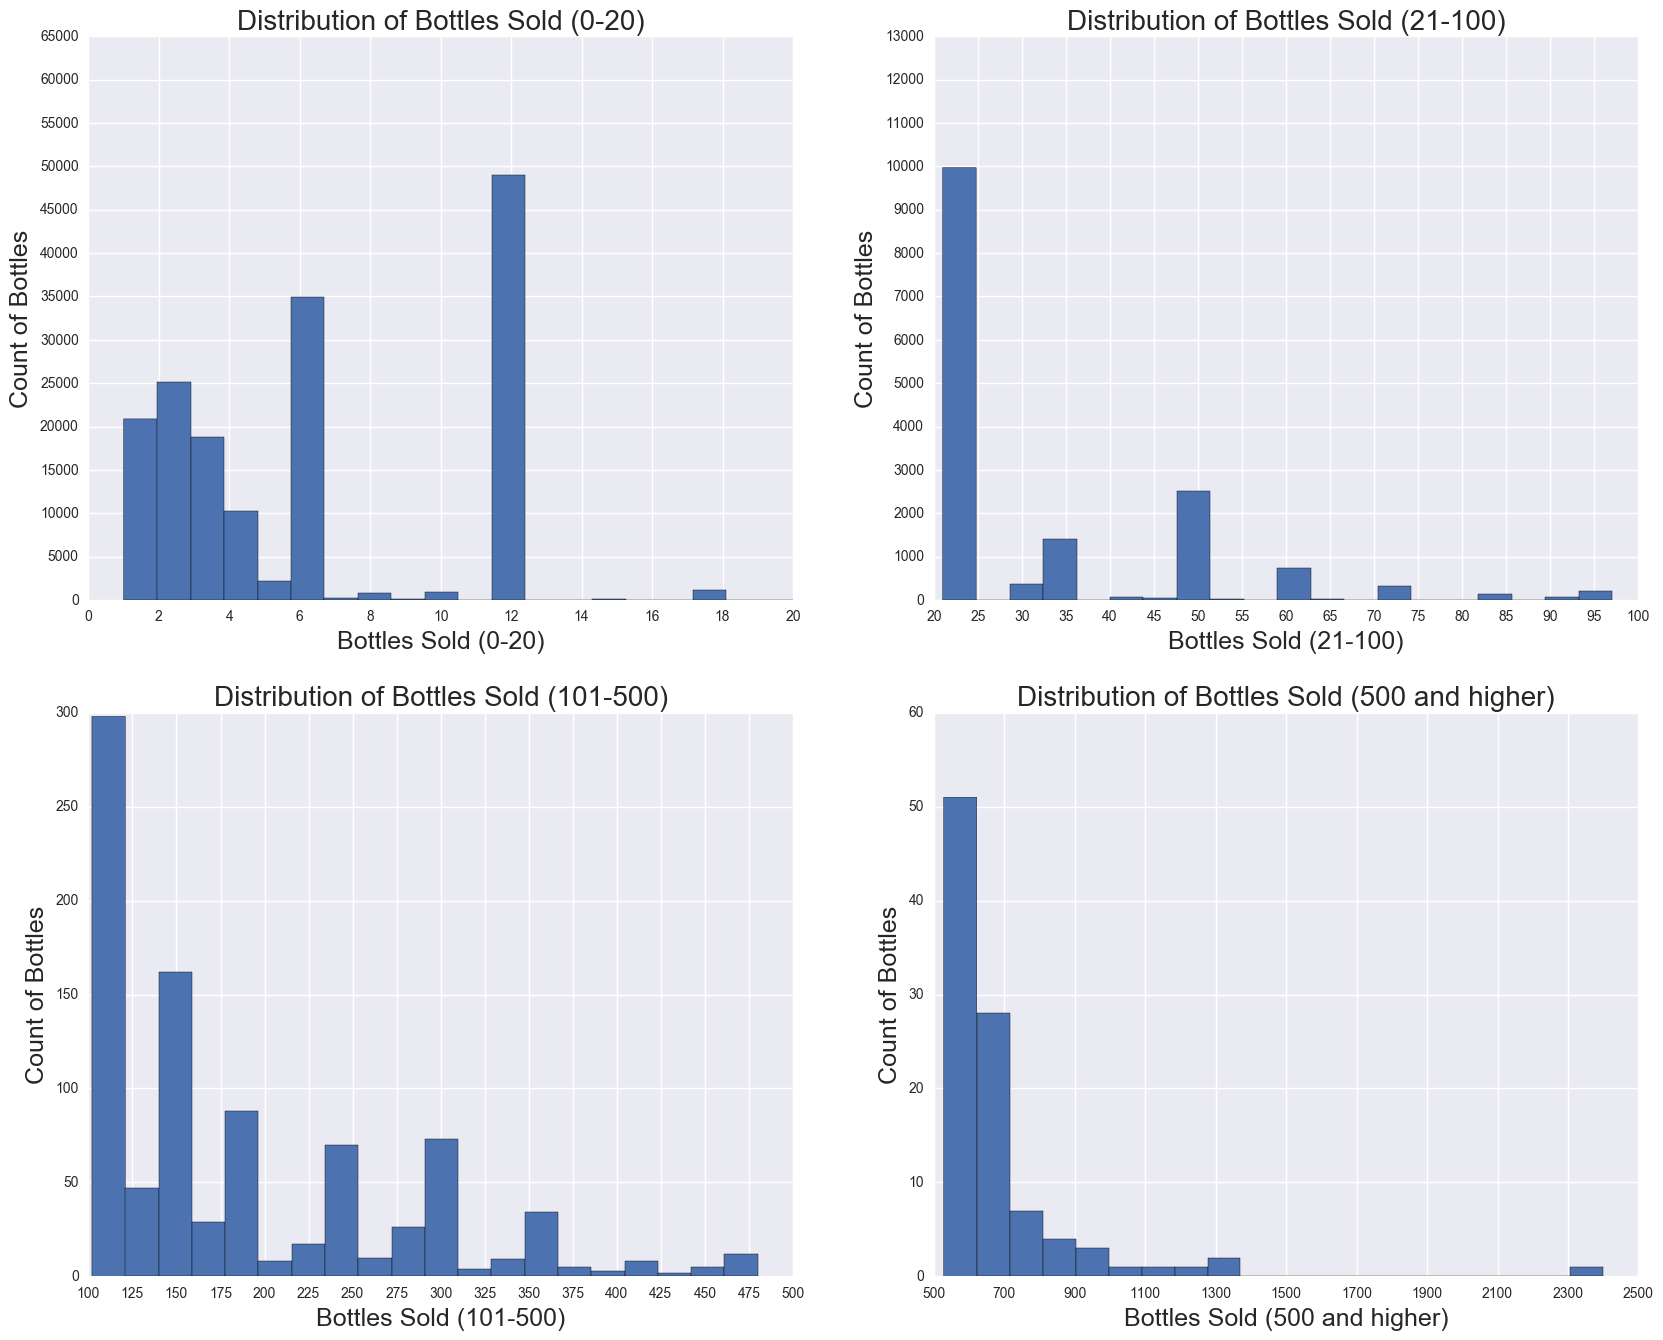

In [27]:
#evaluating bottles sold
fig, axes = plt.subplots(2,2, figsize=(20,16))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = train[X_train['Bottles Sold']<=20]['Bottles Sold'],bins = 20) 
axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][0].set_title('Distribution of Bottles Sold (0-20)',fontsize = 20)
axes[0][0].set_xlabel('Bottles Sold (0-20)',fontsize = 18)
axes[0][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 10 and less than or equal to 100
axes[0][1].hist(x = train[(X_train['Bottles Sold']>20) & (train['Bottles Sold']<=100)]['Bottles Sold'],bins = 20)
axes[0][1].xaxis.set_ticks(np.arange(20, 101, 5))
axes[0][1].yaxis.set_ticks(np.arange(0, 14000, 1000))
axes[0][1].set_title('Distribution of Bottles Sold (21-100)',fontsize = 20)
axes[0][1].set_xlabel('Bottles Sold (21-100)',fontsize = 18)
axes[0][1].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 100 and less than or equal to 500
axes[1][0].hist(x = train[(X_train['Bottles Sold']>100) & (train['Bottles Sold']<=500)]['Bottles Sold'],bins=20)
axes[1][0].xaxis.set_ticks(np.arange(100, 501, 25))
axes[1][0].set_title('Distribution of Bottles Sold (101-500)',fontsize = 20)
axes[1][0].set_xlabel('Bottles Sold (101-500)',fontsize = 18)
axes[1][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 500 and less than or equal to 2700
axes[1][1].hist(x = train[(X_train['Bottles Sold']>500) & (train['Bottles Sold']<=2700)]['Bottles Sold'],bins = 20)
axes[1][1].xaxis.set_ticks(np.arange(500, 2700, 200))
axes[1][1].set_title('Distribution of Bottles Sold (500 and higher)',fontsize = 20)
axes[1][1].set_xlabel('Bottles Sold (500 and higher)',fontsize = 18)
axes[1][1].set_ylabel('Count of Bottles',fontsize = 18);

In [28]:
#lets bin the bottles sold as the outliers will skew the data
bottle_bins = []
for x in train['Bottles Sold']:
    if x <= 25:
        bottle_bins.append('0-25')
    elif (x > 25) & (x <= 100):
        bottle_bins.append('26-100')
    elif (x > 100) & (x <= 500):  
        bottle_bins.append('101-500')
    else:
        bottle_bins.append('500 or more')
insert_bbins = train.columns.get_loc('Bottles Sold') + 1
#df1.insert(insert_bbins,'Bottle bins',bottle_bins)

In [29]:
#creating total cost column
tot_cost = train['Bottles Sold']*train['State Bottle Cost']
insert_totcost = train.columns.get_loc('Sale (Dollars)') + 1
train.insert(insert_totcost,'Total_Cost',tot_cost)

In [36]:
train[train['Bottles Sold'] < 26].groupby(['Item Description','State Bottle Retail'])['Bottles Sold'].sum().to_frame()

Bottles Sold
Item Description                     State Bottle Retail              
10 Cane Rum                          18.75                           3
1792 Sweet Wheat HA                  27.75                           2
1800 Anejo Tequila                   29.25                          51
                                     33.62                           2
1800 Coconut                         23.19                          60
1800 Peach                           14.25                         118
1800 Reposado                        23.19                          94
                                     33.75                          23
1800 Reposado Tequila                13.44                          47
                                     23.19                         692
1800 Silver                          23.19                          51
1800 Silver Tequila                  13.44                         212
                                     23.19                         875
                                     33.75                          31
1800 Ultimate Margarita              14.25                         383
1800 Ultimate Raspberry              14.24                          23
2 Gingers                            17.11                          48
                                     18.11                         437
2 Gingers Mini                       67.68                          12
                                     106.56                          2
2 Gingers w/2 Glasses                18.11                          36
3-Oaks Distillery Whiskey            32.40                           3
360 Bing Cherry                      10.50                          16
360 Bing Cherry Vodka                10.50                          12
360 Concord Grape Vodka              10.50                           4
360 Double Chocolate Vodka           10.50                         123
360 Georgia Peach Vodka              10.50                         125
                                     11.28                           4
360 Glazed Donut Flavored Vodka      10.50                          24
360 Madagascar Vanilla Vodka         10.50                          13
...                                                                ...
Woodford Reserve Double Oaked        42.42                          24
                                     43.97                          90
Woodford Reserve Kentucky Derby 2015 40.52                          44
Woodford Reserve MC 1838 White Corn  74.63                           2
Woodford Reserve w/Glass             31.53                          30
Wyborowa Vodka w/2 Shot Glasses      11.25                           5
X Rated Fusion Liqueur               21.99                          47
                                     28.01                          40
Yahara Bay American Rye Whiskey      13.77                           6
                                     18.92                           6
                                     33.51                           6
                                     37.62                           1
Yahara Bay American Whiskey          18.54                           6
Yahara Bay Barrell Mellowed Gin      9.68                           18
Yahara Bay Lavendar Liqueur          14.15                           6
Yahara Bay Lemoncello                14.45                           6
                                     20.36                           6
Yahara Bay Vanilla Dream             16.14                           6
                                     27.98                           6
Yukon Jack Canadian Liqueur          7.88                          185
                                     13.88                         491
                                     17.63                         765
Yukon Jack Jacapple                  13.88                         141
Yukon Jack Perma Frost Schnapps      14.25                         130
Yukon Jack 

In [37]:
#make all category names upper case
train['Category Name'] = train['Category Name'].apply(lambda x: str(x).upper())
category = train.groupby('Category Name')['Item Number'].nunique().to_frame()
category.reset_index(inplace = True)
#creating category bins 
cat_bins = []
for x in train['Category Name']:
    if 'VODKA' in x:
        cat_bins.append('VODKA')
    elif 'WHISKEY' in x:
        cat_bins.append('WHISKEY')
    elif 'RUM' in x:
        cat_bins.append('RUM')
    elif 'SCHNAPPS' in x:
        cat_bins.append('SCHNAPPS')
    elif 'BRANDIES' in x:
        cat_bins.append('BRANDIES')    
    elif 'GIN' in x:
        cat_bins.append('GIN') 
    elif 'SCOTCH' in x:
        cat_bins.append('SCOTCH') 
    elif 'BOURBON' in x:
        cat_bins.append('BOURBON')
    elif 'AMARETTO' in x:
        cat_bins.append('AMARETTO')         
    elif 'TEQUILA' in x:
        cat_bins.append('TEQUILA') 
    else:
        cat_bins.append('OTHER')
cat_bin_df = pd.DataFrame(cat_bins)
cat_bin_df = cat_bin_df.rename(columns = {0:'Category_Bins'})


The mean # of unique items per store is 82.7353361946
The max # of unique items per store is 675
The min # of unique items per store is 1


,Store Number,Unique_Items
0,2106,217
1,2113,82
2,2130,178
3,2152,69
4,2178,157


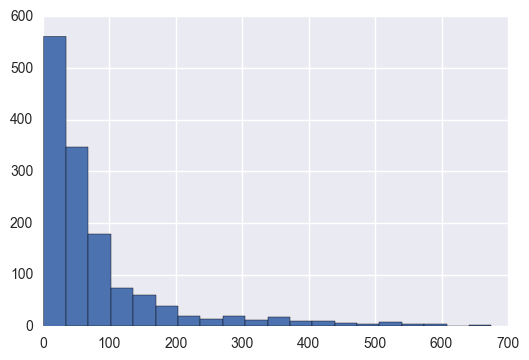

In [38]:
#creating unique items per store - possible proxy for sq footage given more items per store means a bigger store
unique_items_per_store = train[train['Bottles Sold'] < 26].groupby('Store Number')['Item Number'].nunique().to_frame('Unique_Items')
unique_items_per_store.reset_index(inplace = True)
unique_items_per_store.sort_values('Unique_Items',ascending = False)
print "The mean # of unique items per store is", unique_items_per_store['Unique_Items'].mean()
print "The max # of unique items per store is", unique_items_per_store['Unique_Items'].max()
print "The min # of unique items per store is", unique_items_per_store['Unique_Items'].min()
unique_items_per_store['Unique_Items'].hist(bins = 20)
unique_items_per_store.head()

In [41]:
county_store = train.groupby(['County','Store Number'])['Zip Code'].nunique().to_frame('Count')
county_store.reset_index(inplace = True)
county_items = pd.merge(county_store,unique_items_per_store,how= 'outer')
#this is the number of unique items per store in the county. 
county_avgitems = county_items.groupby('County')['Unique_Items'].mean().to_frame('Avg_items_store')
county_avgitems.reset_index(inplace = True)
county_avgitems.head()

city_store = train.groupby(['City','Store Number'])['Zip Code'].nunique().to_frame('Count')
city_store.reset_index(inplace = True)
city_items = pd.merge(city_store,unique_items_per_store)
city_avgitems = city_items.groupby('City')['Unique_Items'].mean().to_frame('Average_items_store')
city_avgitems.reset_index(inplace = True)
city_store.head()

,City,Store Number,Count
0,ACKLEY,3591,1
1,ACKLEY,4415,1
2,ADAIR,4417,1
3,ADAIR,4753,1
4,ADEL,4384,1


In [39]:
train[train['Bottles Sold'] < 26].describe()

,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
count,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000,174585.000000
mean,3586.477223,256.419543,45932.979025,928.630232,9.853952,14.796715,7.210711,6.488705,1.714317,94.934096,63.217453
std,946.316184,141.380729,51835.973399,490.746495,7.077636,10.615642,5.900592,5.774256,1.525456,93.339392,62.196895
min,2106.000000,10.000000,168.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000,0.890000
25%,2603.000000,115.000000,26827.000000,750.000000,5.700000,8.580000,2.000000,1.500000,0.400000,29.880000,19.920000
50%,3721.000000,260.000000,38176.000000,750.000000,8.200000,12.300000,6.000000,4.500000,1.190000,67.470000,44.970000
75%,4375.000000,380.000000,64711.000000,1000.000000,11.960000,17.940000,12.000000,10.500000,2.770000,129.120000,86.040000
max,9013.000000,978.000000,995507.000000,6000.000000,425.000000,637.500000,25.000000,150.000000,39.630000,3712.500000,2475.000000


In [42]:
#creating stores per zip/city/county and county_df
stores_per_zip = train.groupby('Zip Code')['Store Number'].nunique().to_frame('Stores_per_zip')
stores_per_city = train.groupby('City')['Store Number'].nunique().to_frame('Stores_per_City')
stores_per_city.reset_index(inplace = True)
stores_per_county = train.groupby('County')['Store Number'].nunique().to_frame('Stores_per_County')
stores_per_county.reset_index(inplace = True)
#creating a county dataframe to run regression on 
county_df = train[train['Bottles Sold'] < 26].groupby('County')['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
county_df.reset_index(inplace = True)
county_df = pd.merge(county_df,stores_per_county)
county_df['AvgSales'] = county_df['Sale (Dollars)'] / county_df['Stores_per_County']
county_df.head()
county_df = pd.merge(county_df,county_avgitems)
county_df.head()
county_df.sort_values('AvgSales',ascending = False).head()

#target columns
county_target = county_df['Sale (Dollars)']/ county_df['Stores_per_County']

county_pop = pd.read_csv('../Resources/IA_Data_Master.csv')
county_pop = pd.DataFrame(county_pop)
county_df = pd.merge(county_df,county_pop,on='County',how='outer')
county_df['Pop_per_store'] = county_df['Population Estimate'] / county_df['Stores_per_County']
county_df['Pop_house_ratio'] = county_df['Population Estimate'] / county_df['Housing Estimate']
county_df['house_pop_ratio'] = county_df['Housing Estimate'] / county_df['Population Estimate']
county_df['Consumption'] = county_df['Population Estimate'] / county_df['Bottles Sold']

#X's 
county_data = county_df.iloc[:,[6,7,9,10,11]]
county_df.head()

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio,Consumption
0,Adair,34675.91,2778,23085.74,8,4334.488750,34.375000,25564,3671,7228,903.500000,1.968946,0.507886,2.601872
1,Adams,7546.12,520,5028.66,1,7546.120000,118.000000,23707,2007,3796,3796.000000,1.891380,0.528714,7.300000
2,Allamakee,59811.65,4308,39829.40,6,9968.608333,81.833333,24926,7667,13886,2314.333333,1.811139,0.552139,3.223305
3,Appanoose,55532.79,4420,36967.16,6,9255.465000,88.833333,21599,6567,12529,2088.166667,1.907873,0.524144,2.834615
4,Audubon,11440.98,1044,7616.81,4,2860.245000,32.000000,30919,2995,5773,1443.250000,1.927546,0.518794,5.529693


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [625]:
county_df.head()

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio
0,Adair,34500.52,2792,22963.20,8,12.356920,33.625,25564,3671,7228,903.500000,1.968946,0.507886
1,Adams,7540.54,529,5023.99,1,14.254329,122.000,23707,2007,3796,3796.000000,1.891380,0.528714
2,Allamakee,61621.34,4401,41030.79,6,14.001668,82.500,24926,7667,13886,2314.333333,1.811139,0.552139
3,Appanoose,56069.06,4575,37326.51,6,12.255532,88.500,21599,6567,12529,2088.166667,1.907873,0.524144
4,Audubon,12902.13,1077,8593.11,4,11.979694,31.750,30919,2995,5773,1443.250000,1.927546,0.518794


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [914]:
county_data.head(1)

,Avg_items_store,Per Capita Yearly Income,Population Estimate,Pop_per_store,Pop_house_ratio,Consumption
0,33.625,25564,7228,903.5,1.968946,2.588825


[ 0.94990071 -0.04633637  0.14660627  0.02783717 -0.21627385]
0.868111164761
0.0315487876534


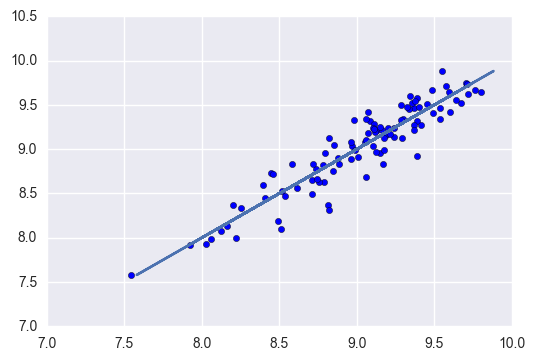

In [917]:
#this is linear regression for county_df
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
y = np.log(county_target)
X = np.log(county_data)

lm = linear_model.LinearRegression()

#regression for county_df
model = lm.fit(X,y)
predict = model.predict(X)
plt.scatter(predict,y)
plt.plot(y,y)
print model.coef_
print model.score(X,y)
print mean_squared_error(y,predict)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict))
county_df['Predict'] = pd.Series(predict)
county_df['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)

In [918]:
#these are top 20 counties in iowa to focus on
county_top12 = county_df.sort_values('Delta', ascending = False).head(12)
county_top12

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio,Consumption,Predict,Delta
27,Delaware,56442.82,4108,37580.57,5,11288.564000,65.600000,26261,8027,17403,3480.600000,2.168058,0.461242,4.236368,8.983230,0.348316
87,Union,73604.63,5323,48972.15,6,12267.438333,76.166667,23007,5904,12469,2078.166667,2.111958,0.473494,2.342476,9.073661,0.341043
95,Winneshiek,97897.94,7298,65191.94,5,19579.588000,117.200000,25062,8838,20709,4141.800000,2.343177,0.426771,2.837627,9.550169,0.332073
41,Hardin,129009.83,9003,85859.10,14,9214.987857,56.571429,25153,8162,17367,1240.500000,2.127787,0.469972,1.929024,8.819606,0.308981
40,Hancock,24843.28,2099,16508.27,4,6210.820000,39.750000,25814,5315,10974,2743.500000,2.064722,0.484327,5.228204,8.444493,0.289555
46,Ida,45605.88,3037,30367.83,4,11401.470000,82.500000,25869,3433,7028,1757.000000,2.047189,0.488475,2.314126,9.062109,0.279389
50,Jefferson,59227.80,4302,39454.71,4,14806.950000,96.500000,27593,7539,17555,4388.750000,2.328558,0.429450,4.080660,9.339851,0.263001
64,Mills,36523.61,2952,24321.82,6,6087.268333,40.166667,27101,6080,14844,2474.000000,2.441447,0.409593,5.028455,8.457304,0.256651
19,Clarke,40879.97,3088,27215.51,6,6813.328333,48.666667,23472,4129,9259,1543.166667,2.242432,0.445944,2.998381,8.582358,0.244278
13,Carroll,122077.48,9065,81260.49,11,11097.952727,72.363636,25430,9427,20498,1863.454545,2.174393,0.459899,2.261224,9.083906,0.230610


In [2]:
#building cities df to find which cities to target
city_df = train[train['Bottles Sold'] < 26].groupby(['City','County'])['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
city_df.reset_index(inplace = True)
county_top12_county = county_top12.iloc[:,0].to_frame()
city_df_top12 = pd.merge(city_df,county_top12_county,on='County')
city_df_top12
#36 cities
city_df_top12 = pd.merge(city_df_top12,stores_per_city)
city_df_top12 = pd.merge(city_df_top12,city_avgitems)
AvgSales = city_df_top12['Sale (Dollars)']/city_df_top12['Stores_per_City']
city_df_top12.insert(3,'AvgSales',AvgSales)
city_pop = pd.read_csv('../Resources/IA_Data_City_Master.csv')
city_df_top12 = pd.merge(city_df_top12,city_pop)
city_df_top12['Pop_per_store'] = city_df_top12['Population'] / city_df_top12['Stores_per_City']
city_df_top12['Consumption'] = city_df_top12['Population'] / city_df_top12['Bottles Sold']
city_df_top12.head()
#extrapolated the number of houses per city
houses_city = (city_df_top12['Population'] * (city_df_top12['Per Capita Income'] / city_df_top12['Household Income'] )).astype(int)
city_df_top12['MtoF'] = city_df_top12['Male'] / city_df_top12['Female']
city_df_top12['Male_pct'] = city_df_top12['Male'] / city_df_top12['Population']
city_df_top12['Female_pct'] = city_df_top12['Female'] / city_df_top12['Population']
city_df_top12['Houses'] = houses_city

#merging with store names
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
store_names.head()
city_names = city_df_top12.iloc[:,0].to_frame()
city_merge_top12 = pd.merge(city_names,city_store)
city_store_merged = pd.merge(city_merge_top12, store_names)
store_type = []
liquor_list = []
grocery_list = []
other_list = []
for x in city_store_merged['Store Name']:
    if ('liquor' or 'spirits' or 'wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('spirits') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beverage') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('bottle') in x.lower():
        store_type.append('Liquor')  
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('vineyard') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beer') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif 'hy-vee' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'fareway' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'target'in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'wal-mart' in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'food' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'supermarket' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
city_store_merged['Store Type'] = pd.Series(store_type)
city_store_merged['Liquor'] = pd.Series(liquor_list)
city_store_merged['Grocery'] = pd.Series(grocery_list)
city_store_merged['Other'] = pd.Series(other_list)
city_storetype = city_store_merged.groupby('City')[['Liquor','Grocery','Other']].sum()
city_storetype.reset_index(inplace = True)
city_reg = pd.merge(city_df_top12,city_storetype)
city_reg['Liquor_pct'] = city_reg['Liquor'] / city_reg['Stores_per_City']
#y = 'AvgSales'
#X Average_items_store, population, income, house value, median age
city_y = city_reg['AvgSales']
city_X = city_reg.iloc[:,[7,8,11,12,16,20]]

NameError: name 'train' is not defined

In [936]:
city_X.head(1)

,Average_items_store,Population,Median Age,Household Income,Pop_per_store,Female_pct
0,29.0,1550,50.8,45335,775.0,0.552258


[ 0.88602968 -0.14260018 -0.73091939 -0.81033755  0.43958332  0.38730771]
0.822591975078
0.165489459201


,City,County,Sale (Dollars),AvgSales,Bottles Sold,Total_Cost,Stores_per_City,Average_items_store,Population,Male,...,House Value,Zip Codes,Pop_per_store,Consumption,MtoF,Male_pct,Female_pct,Houses,Predict,Delta
19,WEST BURLINGTON,Des Moines,50885.59,12721.397500,3653,33873.19,4,60.250000,3051,1351,...,96579,52655,762.750000,0.835204,0.794706,0.442806,0.557194,1820,8.873190,0.577851
29,GLENWOOD,Mills,26332.57,6583.142500,2023,17530.40,4,39.250000,5242,2487,...,136395,51534,1310.500000,2.591201,0.902722,0.474437,0.525563,2197,8.303749,0.488518
12,GOLDFIELD,Wright,1095.60,1095.600000,120,730.32,1,4.000000,612,292,...,65441,50542,612.000000,5.100000,0.912500,0.477124,0.522876,358,6.580634,0.418424
5,IOWA FALLS,Hardin,55867.95,11173.590000,3818,37189.52,5,65.800000,5173,2506,...,93924,50126,1034.600000,1.354898,0.939633,0.484438,0.515562,2704,8.908572,0.412736
8,BELMOND,Wright,23642.58,7880.860000,1859,15738.92,3,48.333333,2322,1205,...,81163,50421,774.000000,1.249059,1.078782,0.518949,0.481051,1439,8.559786,0.412406
10,DOWS,Wright,1822.74,1822.740000,186,1212.24,1,10.000000,519,299,...,39612,50071,519.000000,2.790323,1.359091,0.576108,0.423892,340,7.140128,0.367968
20,CARROLL,Carroll,103156.50,17192.750000,7614,68668.16,6,97.166667,10007,4664,...,125573,51401,1667.833333,1.314289,0.872918,0.466074,0.533926,5714,9.434323,0.317920
30,MALVERN,Mills,2618.16,2618.160000,324,1744.98,1,16.000000,1118,565,...,117712,51551,1118.000000,3.450617,1.021700,0.505367,0.494633,462,7.576780,0.293447
16,BURLINGTON,Des Moines,219334.52,15666.751429,17513,146138.77,14,93.500000,25539,12149,...,85042,52601,1824.214286,1.458288,0.907319,0.475704,0.524296,15774,9.372911,0.286385
6,AFTON,Union,2133.12,2133.120000,192,1417.68,1,8.000000,842,382,...,76773,50830,842.000000,4.385417,0.830435,0.453682,0.546318,455,7.414453,0.250888


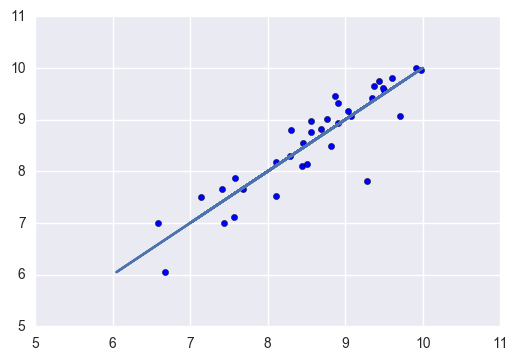

In [941]:
#this is linear regression for city_df
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
y = np.log(city_y)
X = np.log(city_X)

lm = linear_model.LinearRegression()

#regression for county_df
model_city = lm.fit(X,y)
predict_city = model_city.predict(X)
plt.scatter(predict_city,y)
plt.plot(y,y)
print model_city.coef_
print model_city.score(X,y)
print mean_squared_error(y,predict_city)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict_city))
city_df_top12['Predict'] = pd.Series(predict_city)
city_df_top12['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)
city_df_top12.sort_values('Delta',ascending = False)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.